In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import HuberRegressor, LinearRegression


In [274]:
df=pd.read_csv("hours.csv")

In [275]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,8646,01-01-2012,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
1,8647,01-01-2012,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
2,8648,01-01-2012,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
3,8649,01-01-2012,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
4,8650,01-01-2012,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
8730,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
8731,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
8732,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [276]:
df = df[df['yr'] != 0]

In [277]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,8646,01-01-2012,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
1,8647,01-01-2012,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
2,8648,01-01-2012,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
3,8649,01-01-2012,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
4,8650,01-01-2012,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
8730,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
8731,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
8732,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [278]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,8646,01-01-2012,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
1,8647,01-01-2012,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
2,8648,01-01-2012,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
3,8649,01-01-2012,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
4,8650,01-01-2012,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8734 entries, 0 to 8733
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     8734 non-null   int64  
 1   dteday      8734 non-null   object 
 2   season      8734 non-null   int64  
 3   yr          8734 non-null   int64  
 4   mnth        8734 non-null   int64  
 5   hr          8734 non-null   int64  
 6   holiday     8734 non-null   int64  
 7   weekday     8734 non-null   int64  
 8   workingday  8734 non-null   int64  
 9   weathersit  8734 non-null   int64  
 10  temp        8734 non-null   float64
 11  atemp       8734 non-null   float64
 12  hum         8734 non-null   float64
 13  windspeed   8734 non-null   float64
 14  casual      8734 non-null   int64  
 15  registered  8734 non-null   int64  
 16  cnt         8734 non-null   int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.2+ MB


In [280]:
df.apply(lambda x:len(x.unique()))

instant       8734
dteday         366
season           4
yr               1
mnth            12
hr              24
holiday          2
weekday          7
workingday       2
weathersit       4
temp            50
atemp           61
hum             81
windspeed       26
casual         319
registered     772
cnt            866
dtype: int64

In [281]:

df = df.drop(columns=['instant','dteday','yr'])


In [282]:
cols=['season','mnth' ,'hr', 'holiday','weekday' ,'workingday' ,'weathersit']
for col in cols:
      df[col]=df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8734 entries, 0 to 8733
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      8734 non-null   category
 1   mnth        8734 non-null   category
 2   hr          8734 non-null   category
 3   holiday     8734 non-null   category
 4   weekday     8734 non-null   category
 5   workingday  8734 non-null   category
 6   weathersit  8734 non-null   category
 7   temp        8734 non-null   float64 
 8   atemp       8734 non-null   float64 
 9   hum         8734 non-null   float64 
 10  windspeed   8734 non-null   float64 
 11  casual      8734 non-null   int64   
 12  registered  8734 non-null   int64   
 13  cnt         8734 non-null   int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 607.7 KB


In [283]:
df.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# EDA

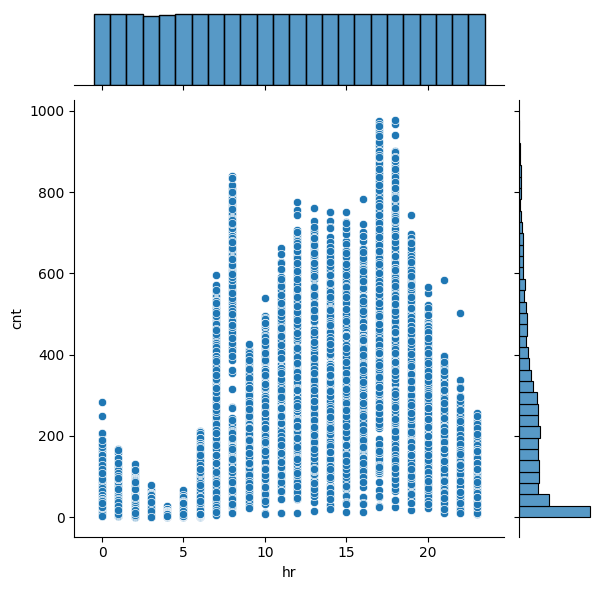

In [284]:
sns.jointplot(x='hr',y='cnt',data=df)

Text(0.5, 1.0, 'Count vs. Hour of Day')

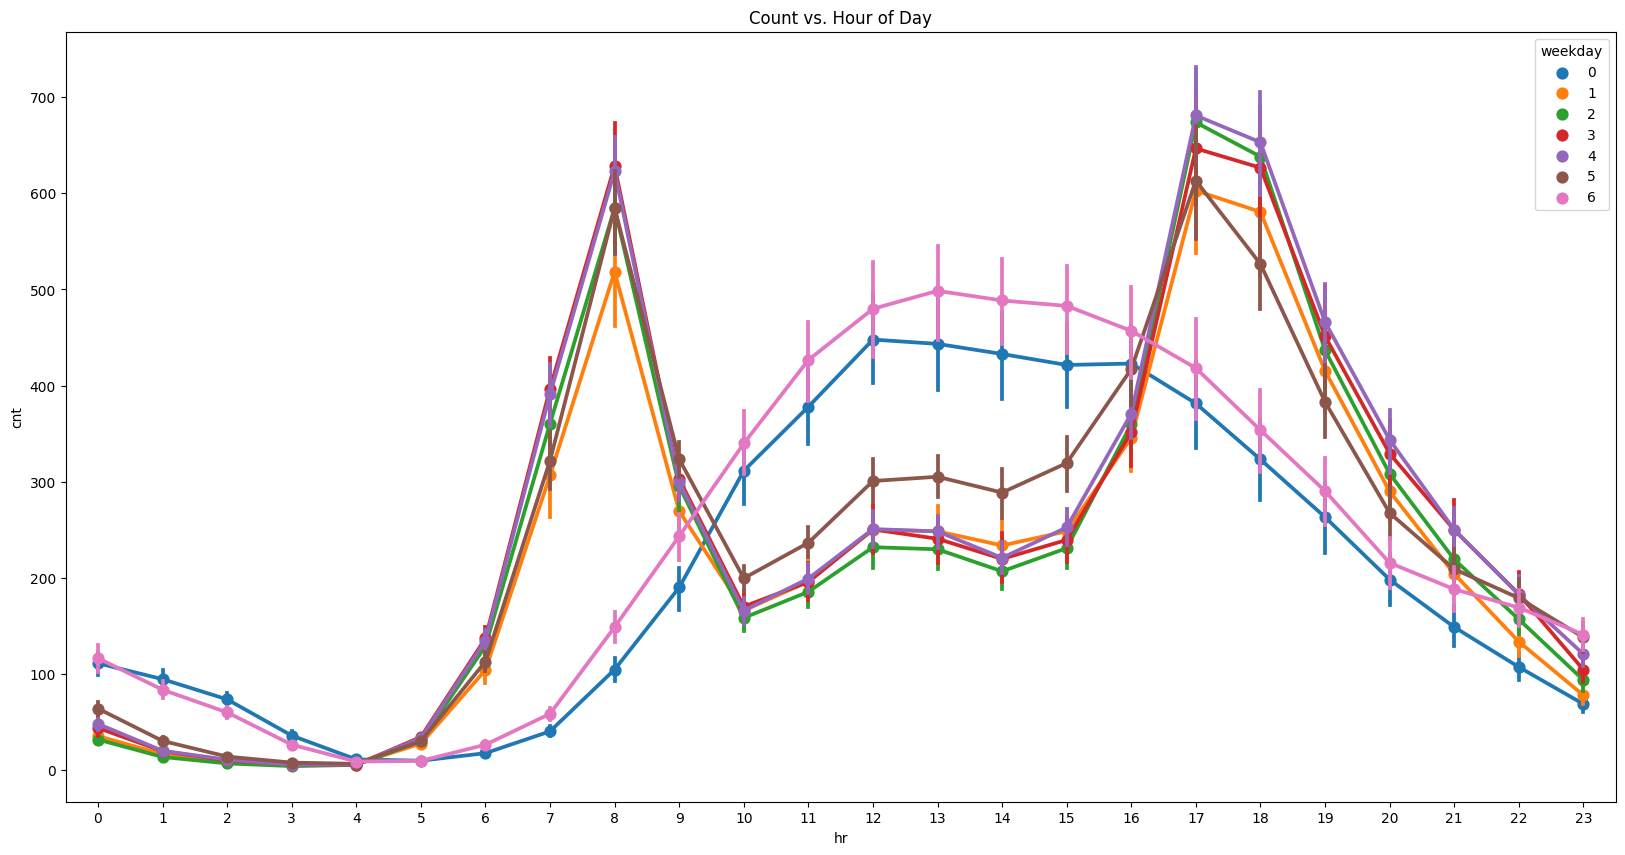

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(20, 10))

sns.pointplot(data=df, x='hr', y='cnt', hue='weekday', ax=ax)

ax.set_title('Count vs. Hour of Day')


In [286]:
import pandas as pd
import plotly.express as px


fig = px.scatter(df, x='hr', y='cnt', color='weekday',
                 title='Count vs. Hour of Day')

fig.show()


In [287]:
import pandas as pd
import plotly.express as px


fig = px.scatter(df.groupby(['hr', 'weekday'])['cnt'].mean().reset_index(),
                 x='hr', y='cnt', color='weekday',
                 error_y=df.groupby(['hr', 'weekday'])['cnt'].std().reset_index()['cnt'],
                 title='Count vs. Hour of Day')

fig.show()


In [288]:
fig = px.line(df, x='hr', y='cnt', color='weekday',
              title='Line Plot: Count vs. Hour of Day by Weekday')

fig.show()

In [289]:


# Group the data to calculate mean values for 'count'
mean_df = df.groupby(['hr', 'weekday'])['cnt'].mean().reset_index()

fig = px.line(mean_df, x='hr', y='cnt', color='weekday',
              title='Line Plot: Count vs. Hour of Day by Weekday')

fig.show()


In [290]:

# List of features to create line plots for
features = ['mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

for feature in features:
    fig = px.line(df, x=feature, y='cnt', color='weekday',title=f'Line Plot for {feature} vs. Count')
    fig.show()


In [291]:
import pandas as pd
import plotly.express as px



# List of features to create line plots for
categorical_features = ['mnth', 'hr', 'holiday', 'workingday', 'weathersit']

for feature in categorical_features:
    group = df.groupby([feature, 'weekday'])['cnt'].mean().reset_index()

    fig = px.line(group, x=feature, y='cnt', color='weekday', title=f'Mean Count vs. {feature}')
    fig.show()


<Axes: ylabel='Frequency'>

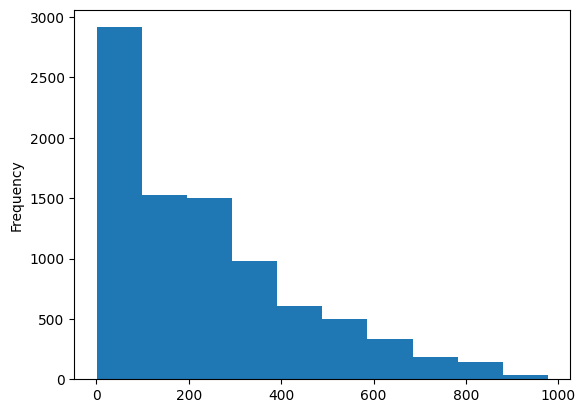

In [292]:
df['cnt'].plot.hist()

Text(0.5, 1.0, 'Average Bike Rental Counts by Weekday')

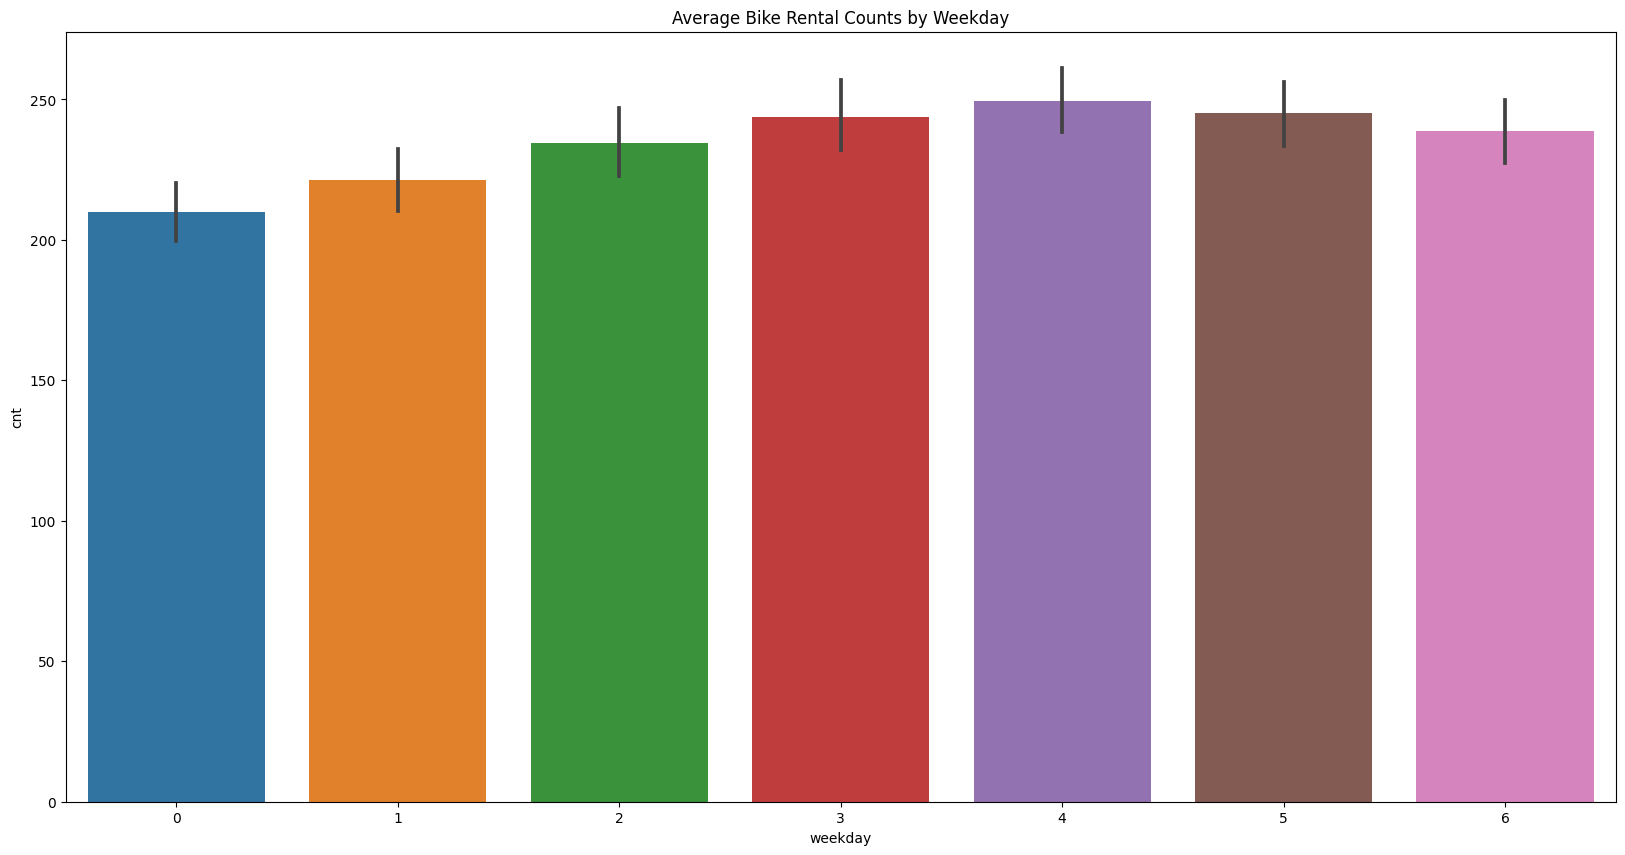

In [293]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=df,x='weekday',y='cnt',ax=ax)
ax.set_title("Average Bike Rental Counts by Weekday")


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8734 entries, 0 to 8733
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      8734 non-null   category
 1   mnth        8734 non-null   category
 2   hr          8734 non-null   category
 3   holiday     8734 non-null   category
 4   weekday     8734 non-null   category
 5   workingday  8734 non-null   category
 6   weathersit  8734 non-null   category
 7   temp        8734 non-null   float64 
 8   atemp       8734 non-null   float64 
 9   hum         8734 non-null   float64 
 10  windspeed   8734 non-null   float64 
 11  casual      8734 non-null   int64   
 12  registered  8734 non-null   int64   
 13  cnt         8734 non-null   int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 607.7 KB


<Axes: xlabel='weathersit', ylabel='count'>

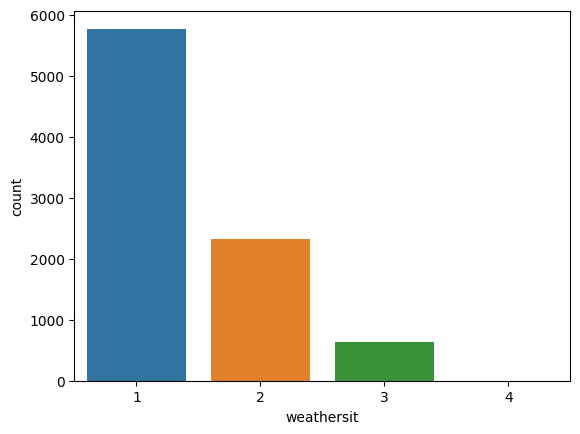

In [295]:
sns.countplot(x='weathersit',data=df)

In [296]:


# Specify the target variable
target_variable = 'cnt'

# Loop through each feature and create visualizations
for feature in df.columns:
    if feature != target_variable:
        fig = px.box(df, x=feature, y=target_variable, title=f'Boxplot for {feature} vs. {target_variable}')
        fig.show()


# could not convert string to float: '2012-01-01'

In [297]:
df['cnt']=np.log(df['cnt'])

<ipython-input-298-0a33278074d9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

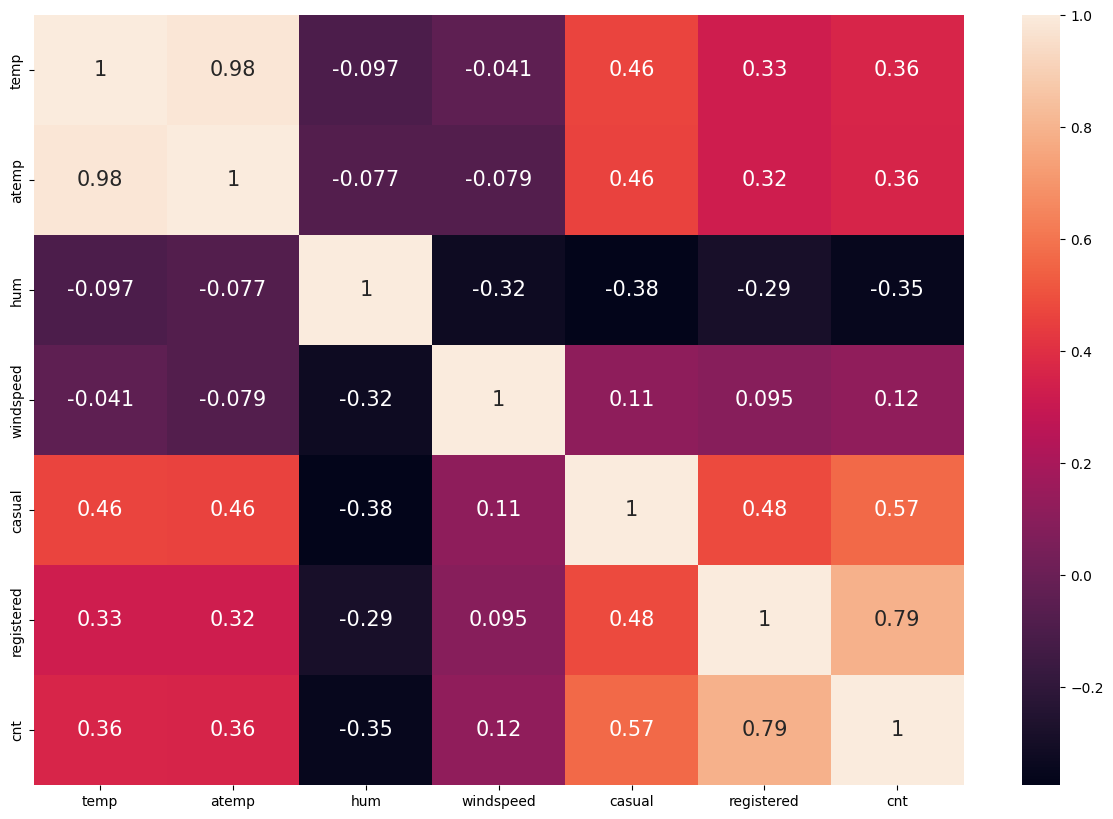

In [298]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,annot_kws={'size':15})

In [299]:
#1.one hot encoding
#2.dimensionality reduction techniques or other feature selection methods
#so i used Onehot encoding

In [300]:

cols = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']


df=pd.get_dummies(df,columns=cols,drop_first=True)
df

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,0.36,0.3788,0.66,0.0000,5,43,3.871201,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.36,0.3485,0.66,0.1343,15,78,4.532599,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.32,0.3485,0.76,0.0000,16,59,4.317488,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.30,0.3333,0.81,0.0000,11,41,3.951244,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.28,0.3030,0.81,0.0896,0,8,2.079442,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,0.26,0.2576,0.60,0.1642,11,108,4.779123,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8730,0.26,0.2576,0.60,0.1642,8,81,4.488636,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8731,0.26,0.2576,0.60,0.1642,7,83,4.499810,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8732,0.26,0.2727,0.56,0.1343,13,48,4.110874,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [301]:
#pd.get_dummies(df['season'],prefix='season',drop_first=True)

In [302]:
ss=corr

<Axes: >

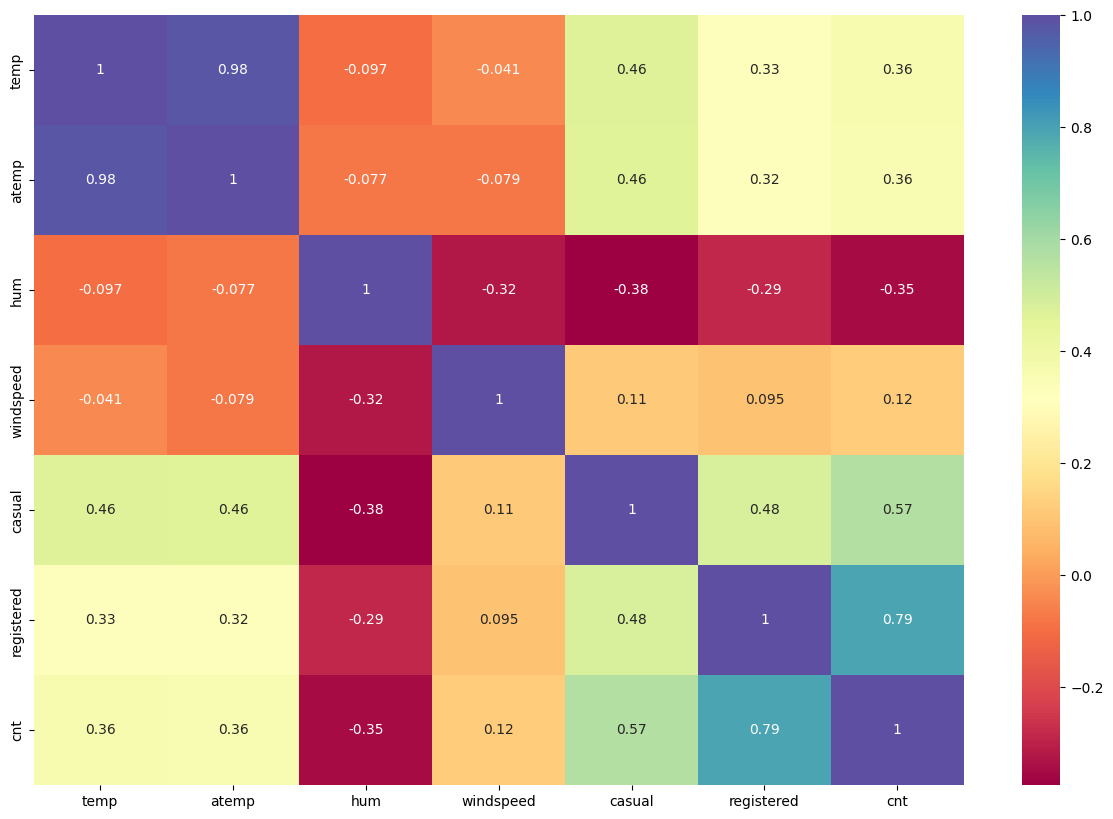

In [303]:
plt.figure(figsize=(15,10))
sns.heatmap(ss,annot=True,annot_kws={'size':10},cmap="Spectral")

# MODEL TRAINING AND ACCURACY

In [304]:
X=df.loc[:,df.columns!="cnt"]
Y=df["cnt"]

In [305]:
from sklearn.model_selection import train_test_split as tts

In [306]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=42)

In [307]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [DecisionTreeRegressor(max_depth=3),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [308]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42,shuffle=True)
    pred = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [309]:
for model in models:
    train(model)

Model: DecisionTreeRegressor(max_depth=3)
CV score: 0.07343114091587824
Model: RandomForestRegressor()
CV score: 0.0003503487905058433
Model: ExtraTreesRegressor()
CV score: 0.00033939238990575064
Model: GradientBoostingRegressor()
CV score: 0.0009111854859177046


In [310]:
from sklearn import tree
Decision=tree.DecisionTreeRegressor(max_depth=3)
Decision.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3)

In [311]:
y_test_pred=Decision.predict(X_test)

In [312]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_test_pred)

0.9666588316528051

In [313]:
!pip install graphviz

In [314]:
from sklearn.tree import export_graphviz
import graphviz

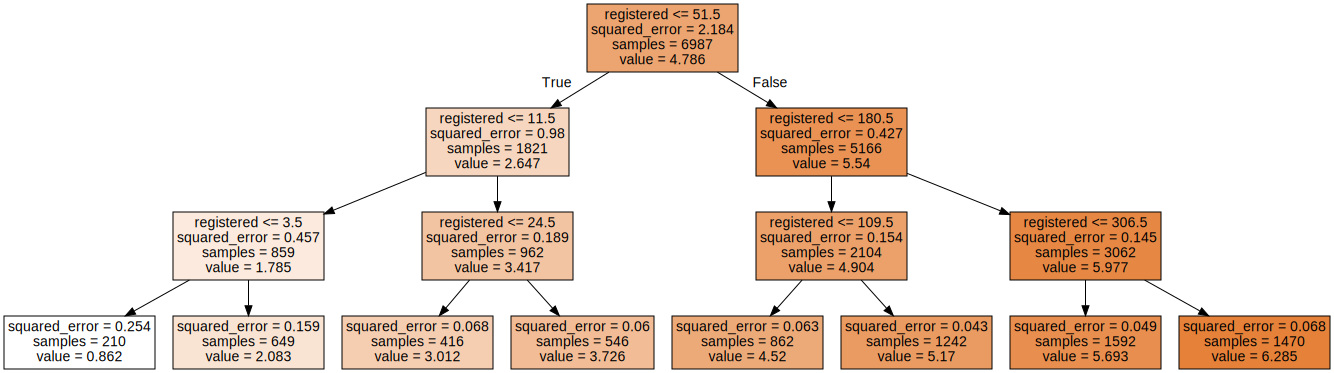

In [315]:
dot_data = export_graphviz(Decision, out_file=None, filled=True,feature_names=X_train.columns)
graph = graphviz.Source(dot_data)
graph

In [316]:
graph.render("decision_tree")
graph.view("decision_tree")

'decision_tree.pdf'